<a href="https://colab.research.google.com/github/THRUPTHIKN2004/THRUPTHIKN2004/blob/main/mini-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Crime prediction**

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("/crime_dataset_india.csv")

In [4]:
df.shape

(40160, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


**Exploratory Data Analysis**

In [6]:
import matplotlib.pyplot as plt
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [7]:
print(df.isnull().sum)

<bound method DataFrame.sum of        Report Number  Date Reported  Date of Occurrence  Time of Occurrence  \
0              False          False               False               False   
1              False          False               False               False   
2              False          False               False               False   
3              False          False               False               False   
4              False          False               False               False   
...              ...            ...                 ...                 ...   
40155          False          False               False               False   
40156          False          False               False               False   
40157          False          False               False               False   
40158          False          False               False               False   
40159          False          False               False               False   

        City  Crime 

In [8]:
print(df.isnull())

       Report Number  Date Reported  Date of Occurrence  Time of Occurrence  \
0              False          False               False               False   
1              False          False               False               False   
2              False          False               False               False   
3              False          False               False               False   
4              False          False               False               False   
...              ...            ...                 ...                 ...   
40155          False          False               False               False   
40156          False          False               False               False   
40157          False          False               False               False   
40158          False          False               False               False   
40159          False          False               False               False   

        City  Crime Code  Crime Description  Victim

In [9]:
df=df.dropna()

In [10]:
print(df.isnull())

       Report Number  Date Reported  Date of Occurrence  Time of Occurrence  \
3              False          False               False               False   
4              False          False               False               False   
5              False          False               False               False   
6              False          False               False               False   
10             False          False               False               False   
...              ...            ...                 ...                 ...   
40144          False          False               False               False   
40146          False          False               False               False   
40149          False          False               False               False   
40153          False          False               False               False   
40159          False          False               False               False   

        City  Crime Code  Crime Description  Victim

**Histogram**

array([[<Axes: title={'center': 'Report Number'}>,
        <Axes: title={'center': 'Crime Code'}>],
       [<Axes: title={'center': 'Victim Age'}>,
        <Axes: title={'center': 'Police Deployed'}>]], dtype=object)

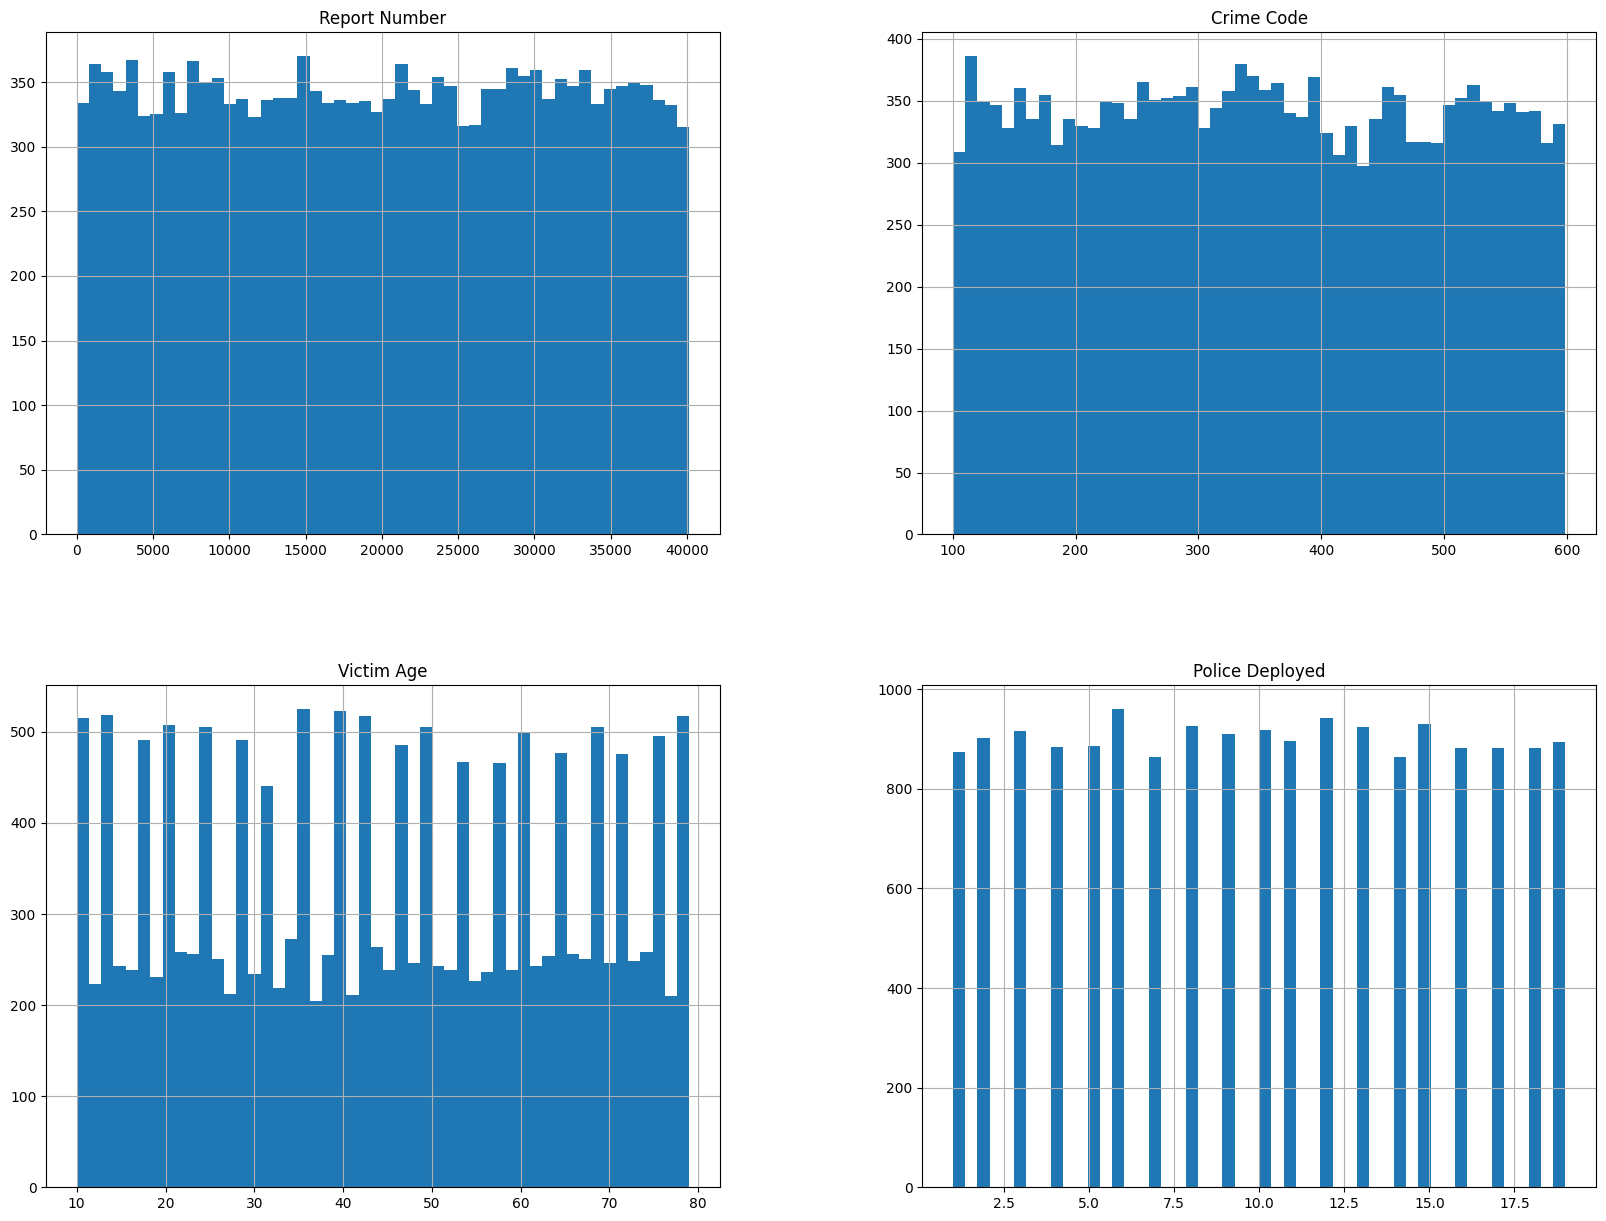

In [11]:
df.hist(bins=50, figsize=(20,15))

<Axes: ylabel='count'>

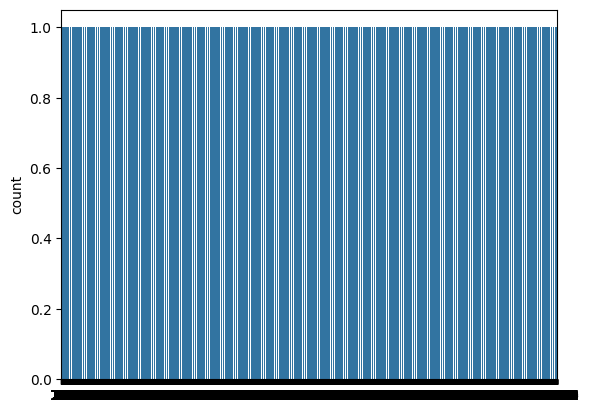

In [12]:
import seaborn as sns
sns.countplot(df['Victim Age'])

<Axes: xlabel='count', ylabel='City'>

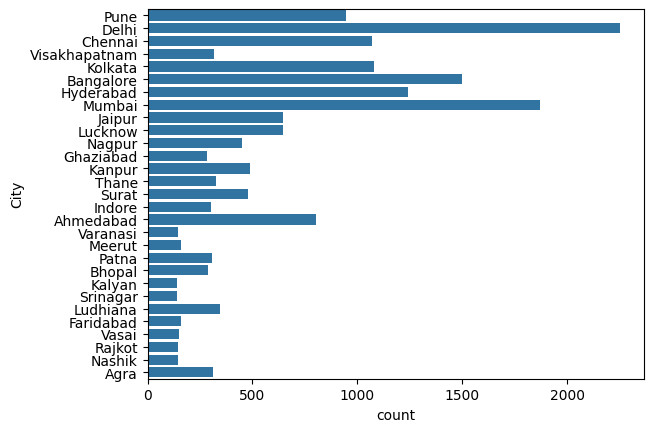

In [13]:
sns.countplot(df['City'])

<Axes: xlabel='count', ylabel='Crime Description'>

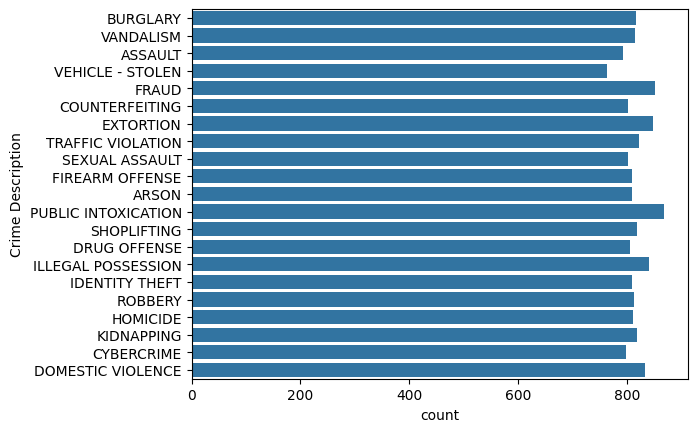

In [14]:
sns.countplot(df['Crime Description'])

<Axes: xlabel='count', ylabel='Crime Domain'>

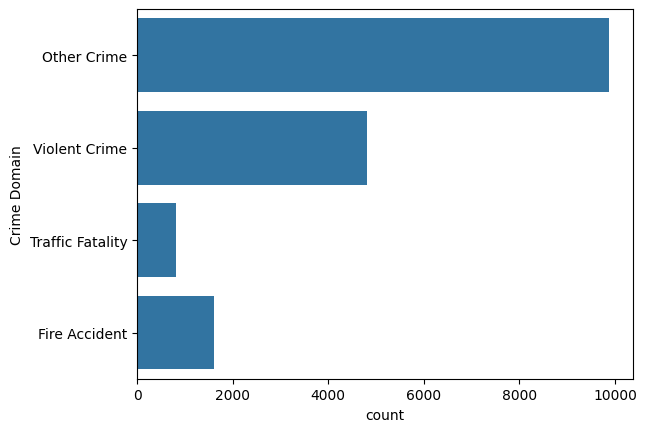

In [15]:
sns.countplot(df['Crime Domain'])

<Axes: xlabel='count', ylabel='Weapon Used'>

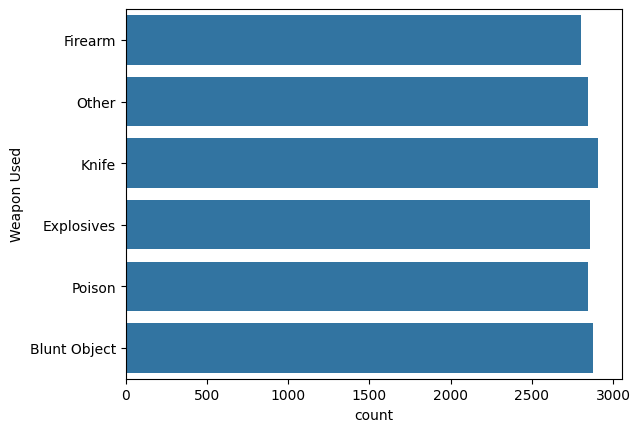

In [16]:
sns.countplot(df['Weapon Used'])

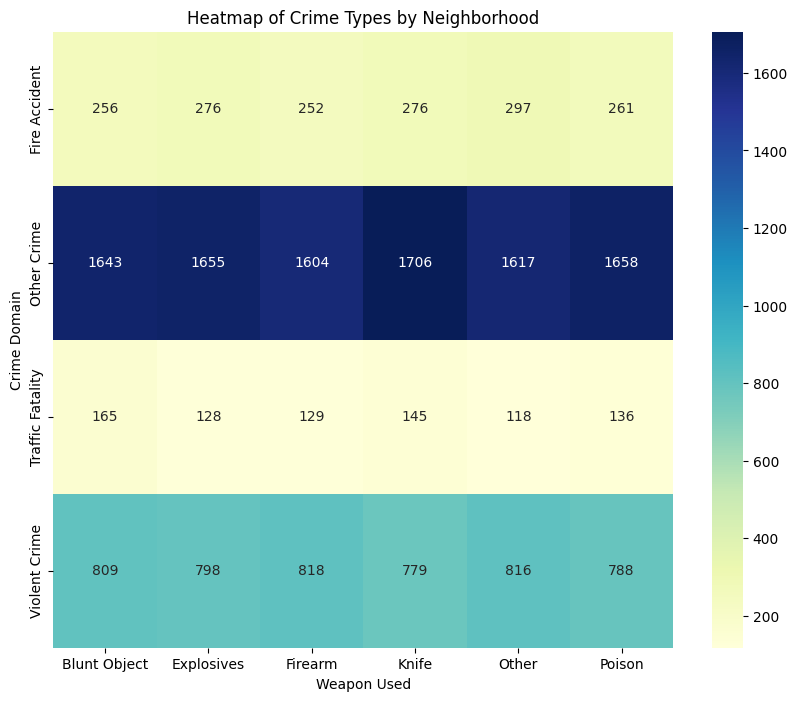

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation between two categorical variables
cross_tab = pd.crosstab(df['Crime Domain'], df['Weapon Used'])

# Plot the cross-tab as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Crime Types by Neighborhood")
plt.show()

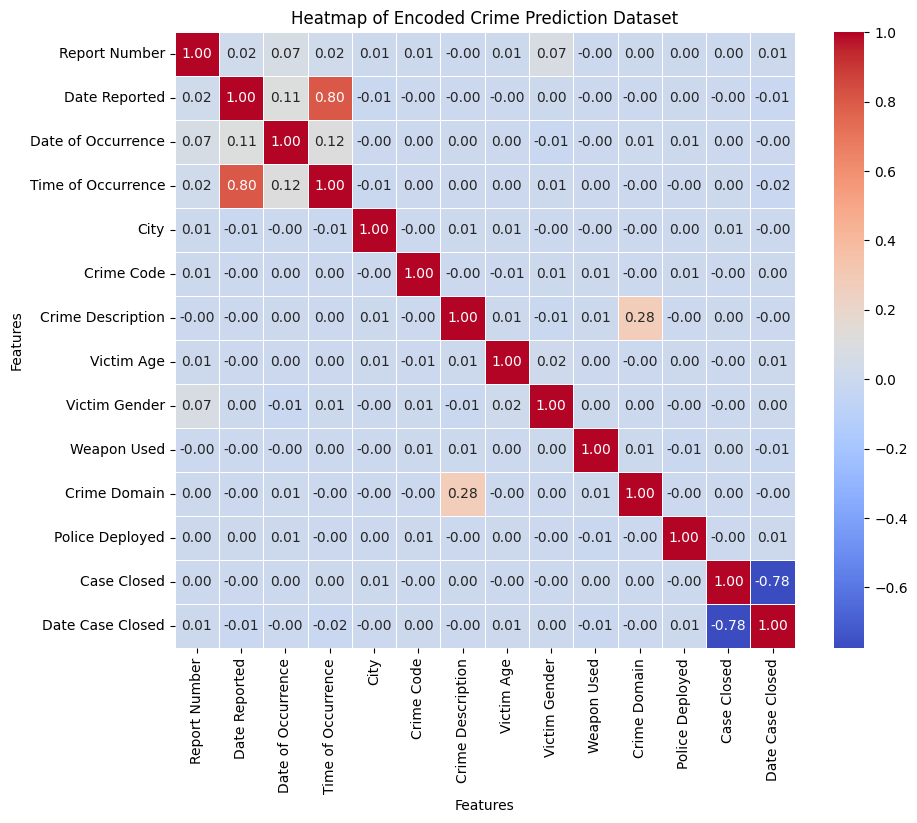

In [18]:
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/crime_dataset_india.csv') # Replace with your file path

# Convert all columns with string values to numerical using Label Encoding
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object': # Check if column is of string type
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str)) # Encode the string data
        label_encoders[column] = le # Save the encoder if you need to decode later

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add labels and title
plt.title("Heatmap of Encoded Crime Prediction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")

# Display the heatmap
plt.show()

In [19]:
# Split into features and target variable
from sklearn.model_selection import train_test_split
X = df.drop('Crime Code', axis=1)  # Replace 'Crime Code' with your target column
y = df['Crime Code']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
# Sample a random subset (50% of the data)
df_subset = df.sample(frac=0.5, random_state=42)

In [21]:
df = df.sample(frac=0.1, random_state=42)  # Use 10% of the data for testing

In [22]:
print(df.memory_usage(deep=True))

Index                 32128
Report Number         32128
Date Reported         32128
Date of Occurrence    32128
Time of Occurrence    32128
City                  32128
Crime Code            32128
Crime Description     32128
Victim Age            32128
Victim Gender         32128
Weapon Used           32128
Crime Domain          32128
Police Deployed       32128
Case Closed           32128
Date Case Closed      32128
dtype: int64


In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report  # Import classification_report

model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         100       0.00      0.00      0.00        13
         101       0.00      0.00      0.00         9
         102       0.00      0.00      0.00        16
         103       0.00      0.00      0.00        10
         104       0.00      0.00      0.00        10
         105       0.00      0.00      0.00         7
         106       0.00      0.00      0.00         9
         107       0.00      0.00      0.00        11
         108       0.00      0.00      0.00        10
         109       0.00      0.00      0.00        21
         110       0.00      0.00      0.00        15
         111       0.00      0.00      0.00        11
         112       0.00      0.00      0.00        11
         113       0.00      0.00      0.00         9
         114       0.00      0.00      0.00        13
         115       0.00      0.00      0.00        10
         116       0.00      0.00      0.00        16
         117       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Step 1: Data Cleaning and Preprocessing
import pandas as pd # Make sure pandas is imported

# Assuming your data is in a CSV file named 'crime_data.csv'
crime_data = pd.read_csv('/crime_dataset_india.csv')  # Load your data into 'crime_data'

# Convert datetime columns to proper datetime format
datetime_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in datetime_columns:
    crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')

# Handle null values in 'Date Case Closed'
crime_data['Date Case Closed'] = crime_data['Date Case Closed'].fillna("Not Closed")

# ... (rest of your code)

<ipython-input-24-2a16235744aa>:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')


In [25]:
datetime_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in datetime_columns:
    crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')

# Handle null values in 'Date Case Closed'
crime_data['Date Case Closed'] = crime_data['Date Case Closed'].fillna("Not Closed")

# Create new time-based features
crime_data['Year Reported'] = crime_data['Date Reported'].dt.year
crime_data['Month Reported'] = crime_data['Date Reported'].dt.month
crime_data['Day Reported'] = crime_data['Date Reported'].dt.day
crime_data['Hour Reported'] = crime_data['Date Reported'].dt.hour

crime_data['Year Occurred'] = crime_data['Date of Occurrence'].dt.year
crime_data['Month Occurred'] = crime_data['Date of Occurrence'].dt.month
crime_data['Day Occurred'] = crime_data['Date of Occurrence'].dt.day
crime_data['Hour Occurred'] = crime_data['Date of Occurrence'].dt.hour

# Drop the original datetime columns to avoid redundancy (optional)
crime_data.drop(columns=['Date Reported', 'Date of Occurrence'], inplace=True)

# Encode categorical columns
categorical_columns = ['City', 'Crime Description', 'Victim Gender',
                       'Weapon Used', 'Crime Domain', 'Case Closed']
crime_data = pd.get_dummies(crime_data, columns=categorical_columns, drop_first=True, sparse=True)

# Check the processed data structure
crime_data.head(), crime_data.info()

<ipython-input-25-7a9ff22dd1b2>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 73 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   Report Number                          40160 non-null  int64              
 1   Time of Occurrence                     40160 non-null  object             
 2   Crime Code                             40160 non-null  int64              
 3   Victim Age                             40160 non-null  int64              
 4   Police Deployed                        40160 non-null  int64              
 5   Date Case Closed                       40160 non-null  object             
 6   Year Reported                          15874 non-null  float64            
 7   Month Reported                         15874 non-null  float64            
 8   Day Reported                           15874 non-null  float64            
 9   Hour R

<ipython-input-25-7a9ff22dd1b2>:28: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  crime_data.head(), crime_data.info()


(   Report Number Time of Occurrence  Crime Code  Victim Age  Police Deployed  \
 0              1   01-01-2020 01:11         576          16               13   
 1              2   01-01-2020 06:26         128          37                9   
 2              3   01-01-2020 14:30         271          48               15   
 3              4   01-01-2020 14:46         170          49                1   
 4              5   01-01-2020 16:51         421          30               18   
 
       Date Case Closed  Year Reported  Month Reported  Day Reported  \
 0           Not Closed         2020.0             2.0           1.0   
 1           Not Closed         2020.0             1.0           1.0   
 2           Not Closed         2020.0             2.0           1.0   
 3  2020-04-29 05:00:00         2020.0             1.0           1.0   
 4  2020-01-08 21:00:00         2020.0             1.0           1.0   
 
    Hour Reported  ...  Victim Gender_X  Weapon Used_Explosives  \
 0         

<ipython-input-26-82c4d07c021d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_domain_counts.index, y=crime_domain_counts.values, palette='viridis')


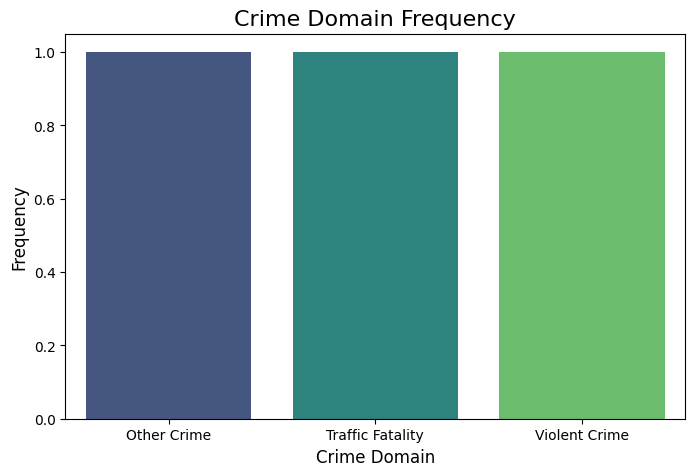

<ipython-input-26-82c4d07c021d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year Occurred', data=crime_data, palette='coolwarm', order=sorted(crime_data['Year Occurred'].dropna().unique()))


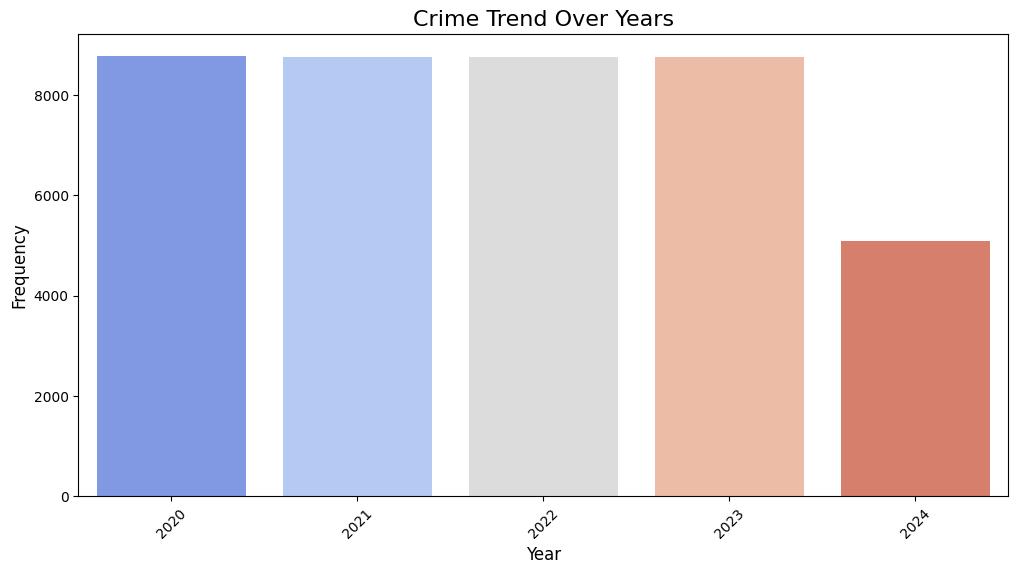

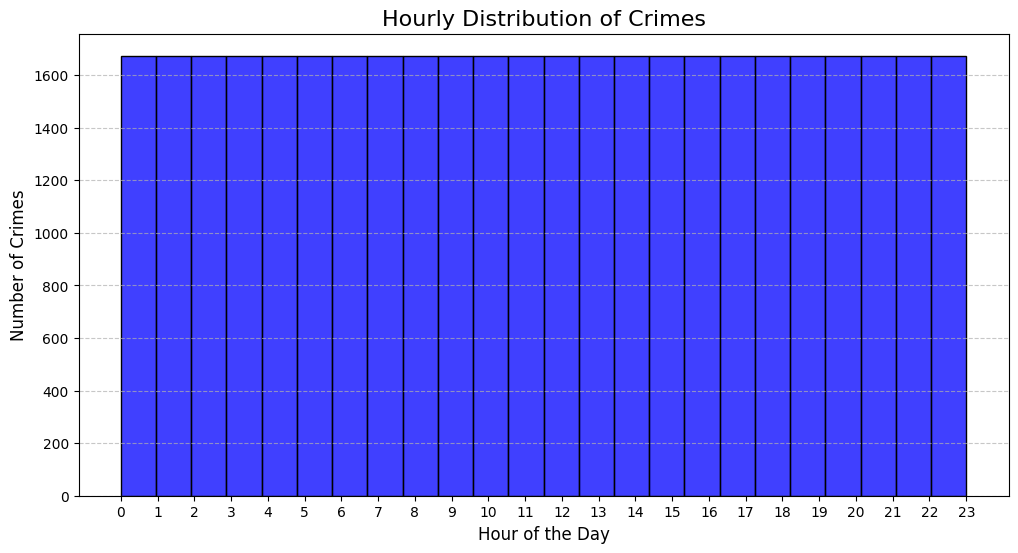

<ipython-input-26-82c4d07c021d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victim_gender_counts.index, y=victim_gender_counts.values, palette='magma')


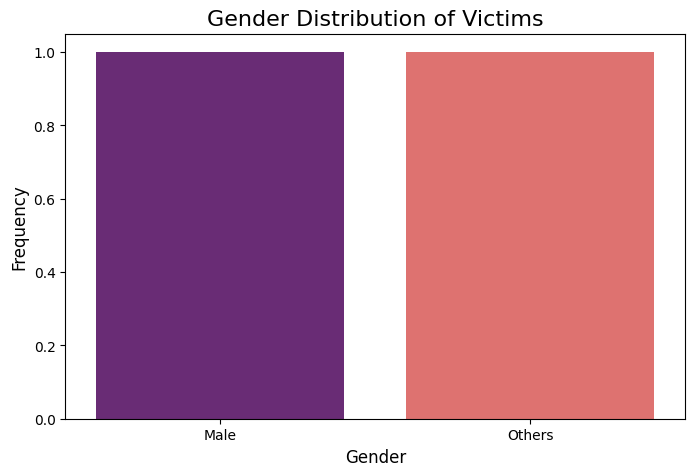

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Exploratory Data Analysis (EDA)

# General Statistics: Frequency of crime domains
crime_domain_counts = crime_data[['Crime Domain_Other Crime',
                                  'Crime Domain_Traffic Fatality',
                                  'Crime Domain_Violent Crime']].sum()
crime_domain_counts.index = ['Other Crime', 'Traffic Fatality', 'Violent Crime']

# Plotting Crime Domain Counts
plt.figure(figsize=(8, 5))
sns.barplot(x=crime_domain_counts.index, y=crime_domain_counts.values, palette='viridis')
plt.title('Crime Domain Frequency', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Crime Domain', fontsize=12)
plt.show()

# Crime Trends Over Years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year Occurred', data=crime_data, palette='coolwarm', order=sorted(crime_data['Year Occurred'].dropna().unique()))
plt.title('Crime Trend Over Years', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Hourly Analysis of Crimes
plt.figure(figsize=(12, 6))
sns.histplot(crime_data['Hour Occurred'], bins=24, kde=False, color='blue')
plt.title('Hourly Distribution of Crimes', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gender Distribution of Victims
victim_gender_counts = crime_data[['Victim Gender_M', 'Victim Gender_X']].sum()
victim_gender_counts.index = ['Male', 'Others']

plt.figure(figsize=(8, 5))
sns.barplot(x=victim_gender_counts.index, y=victim_gender_counts.values, palette='magma')
plt.title('Gender Distribution of Victims', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()


<ipython-input-27-aca157fcbbc0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='cool')


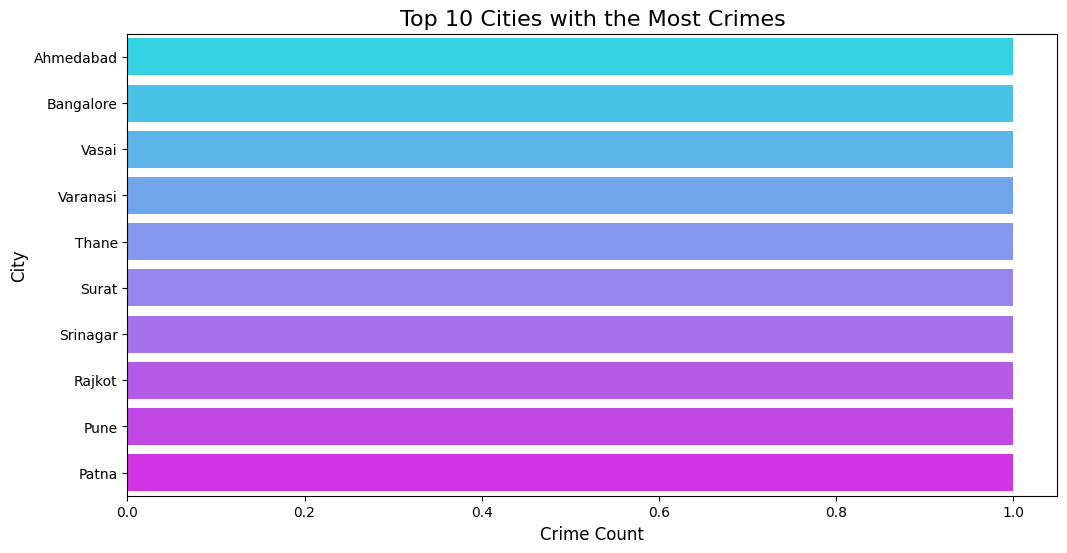

In [27]:
# Step 3: Geographical Analysis

# Top 10 Cities with the Most Crimes
top_cities = crime_data.filter(like='City_').sum().sort_values(ascending=False).head(10)
top_cities.index = [col.split('_')[1] for col in top_cities.index]

# Plotting the Top 10 Cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='cool')
plt.title('Top 10 Cities with the Most Crimes', fontsize=16)
plt.xlabel('Crime Count', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()


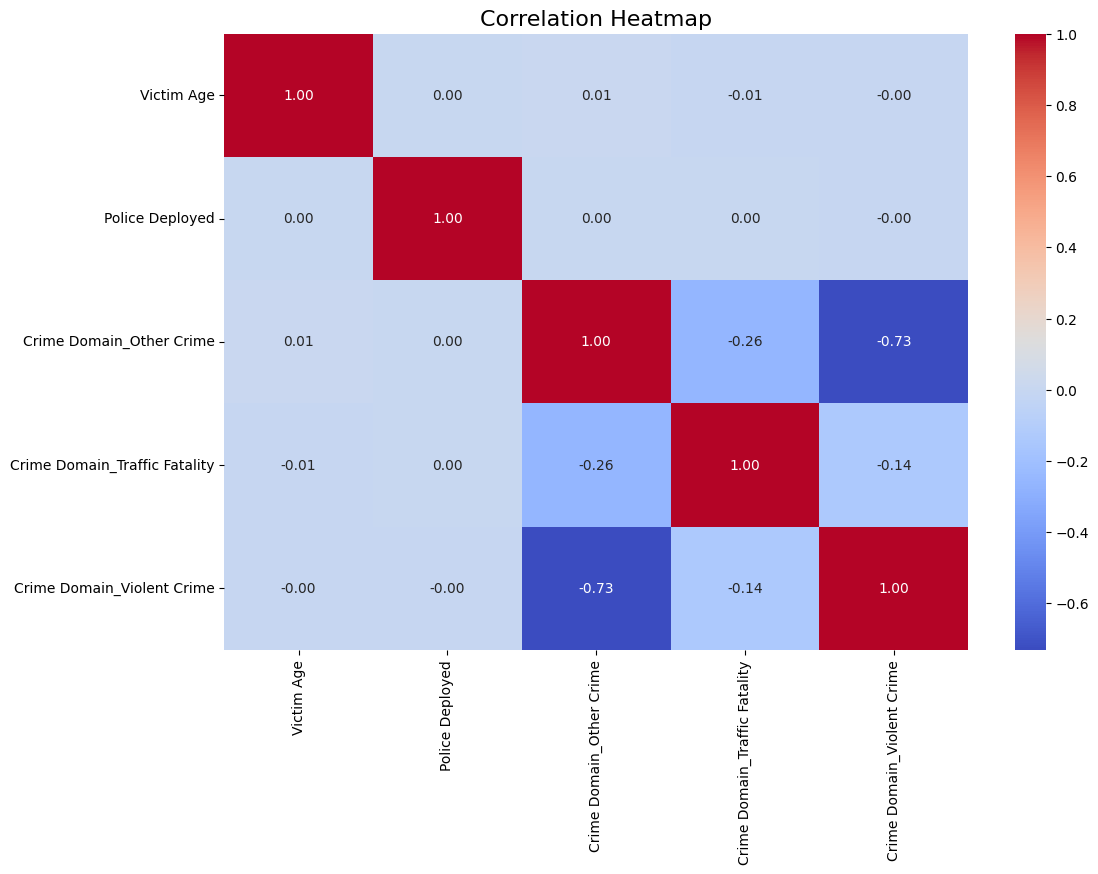

In [28]:
# Step 4: Correlation Analysis

# Selecting numeric columns for correlation analysis
numeric_columns = ['Victim Age', 'Police Deployed'] + [col for col in crime_data.columns if col.startswith('Crime Domain_')]
correlation_matrix = crime_data[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [31]:
# Step 1: Convert the dataset into a sparse matrix for memory efficiency
# Select only numeric and dummy variable columns
numeric_features = crime_data.select_dtypes(include=['number', 'uint8']).columns  # Include dummy variables (uint8)
X_sparse = csr_matrix(crime_data[numeric_features].drop(columns=['Crime Code']))
y = crime_data['Crime Code']

In [35]:
df.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

# Ensure all columns are numeric
numeric_data = crime_data.select_dtypes(include=['number', 'bool'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaN with column mean
X = numeric_data.drop(columns=['Crime Domain_Violent Crime'])
X = imputer.fit_transform(X)
y = numeric_data['Crime Domain_Violent Crime']

# Convert to sparse matrix
X_sparse = csr_matrix(X)

# Reduce dimensions using Truncated SVD
svd = TruncatedSVD(n_components=50, random_state=42)  # Set n_components to <= n_features
X_reduced = svd.fit_transform(X_sparse)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=50)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1074: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1074: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5710
         1.0       1.00      1.00      1.00      2322

    accuracy                           1.00      8032
   macro avg       1.00      1.00      1.00      8032
weighted avg       1.00      1.00      1.00      8032



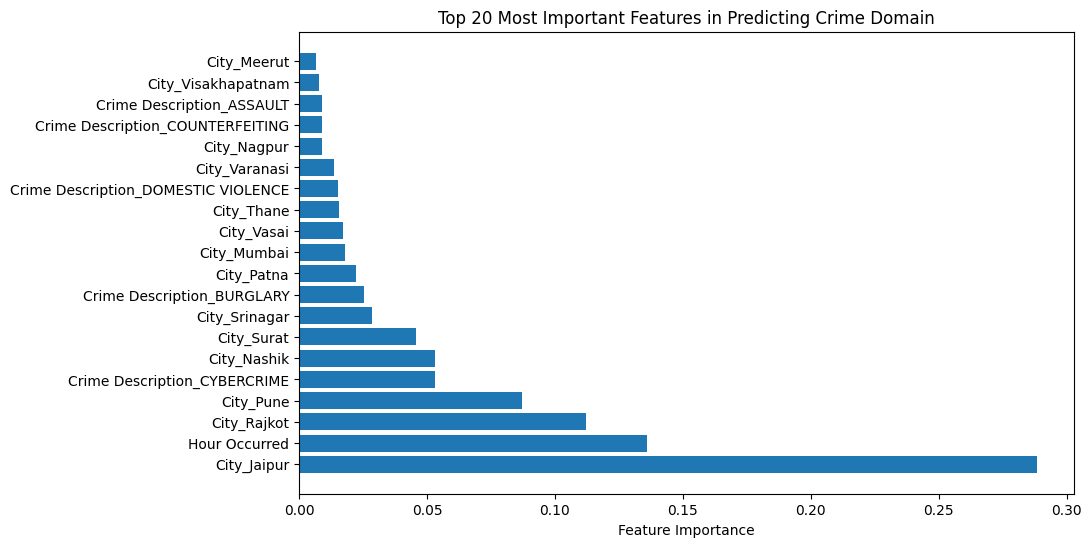

In [41]:
# Step 6: Feature Importance Analysis

# Get feature importance from the trained model
importances = model.feature_importances_
indices = importances.argsort()[::-1]

# Use the original X columns for feature names
original_columns = numeric_data.drop(columns=['Crime Domain_Violent Crime']).columns

# Plotting the top 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(range(20), importances[indices][:20], align="center")
plt.yticks(range(20), [original_columns[i] for i in indices[:20]])
plt.xlabel("Feature Importance")
plt.title("Top 20 Most Important Features in Predicting Crime Domain")
plt.show()


In [42]:
from sklearn.model_selection import cross_val_score

# Step 6: Cross-Validation
cv_scores = cross_val_score(model, X_reduced, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Average accuracy: {cv_scores.mean()}")


Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Average accuracy: 1.0


In [43]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Step 6: Hyperparameter Tuning
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best score found: {random_search.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Best score found: 1.0


In [44]:
import joblib

# Step 7: Save the trained model
joblib.dump(random_search.best_estimator_, 'crime_prediction_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [45]:
# Step 7: Load the model and make predictions
loaded_model = joblib.load('crime_prediction_model.pkl')

# Example of making a prediction on new data
new_data = X_test[0].reshape(1, -1)  # Reshape a single sample from X_test
prediction = loaded_model.predict(new_data)

print(f"Predicted Crime Domain: {prediction}")

Predicted Crime Domain: [0.]
